In [27]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, precision_score, precision_recall_curve, average_precision_score
from sklearn.model_selection import GridSearchCV 

In [2]:
# Load the Heart prediction dataset (Taken from kaggle - https://www.kaggle.com/datasets/shantanugarg274/heart-prediction-dataset-quantum)
data = pd.read_csv("Heart Prediction Quantum Dataset.csv")
data


,Age,Gender,BloodPressure,Cholesterol,HeartRate,QuantumPatternFeature,HeartDisease
0,68,1,105,191,107,8.362241,1
1,58,0,97,249,89,9.249002,0
2,44,0,93,190,82,7.942542,1
3,72,1,93,183,101,6.495155,1
4,37,0,145,166,103,7.653900,1
...,...,...,...,...,...,...,...
495,34,0,126,292,116,9.303403,0
496,41,0,164,248,114,9.067889,0
497,45,1,159,175,75,8.718708,0
498,55,0,107,157,101,7.337650,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    500 non-null    int64  
 1   Gender                 500 non-null    int64  
 2   BloodPressure          500 non-null    int64  
 3   Cholesterol            500 non-null    int64  
 4   HeartRate              500 non-null    int64  
 5   QuantumPatternFeature  500 non-null    float64
 6   HeartDisease           500 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 27.5 KB


In [4]:
data.describe()

,Age,Gender,BloodPressure,Cholesterol,HeartRate,QuantumPatternFeature,HeartDisease
count,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000
mean,54.864000,0.468000,132.874000,221.50000,88.766000,8.317407,0.600000
std,14.315004,0.499475,26.418516,43.86363,17.417289,0.919629,0.490389
min,30.000000,0.000000,90.000000,150.00000,60.000000,6.164692,0.000000
25%,43.000000,0.000000,111.000000,183.75000,73.000000,7.675779,0.000000
50%,55.000000,0.000000,132.000000,221.00000,89.000000,8.323064,1.000000
75%,66.250000,1.000000,155.000000,258.00000,104.000000,8.935999,1.000000
max,79.000000,1.000000,179.000000,299.00000,119.000000,10.784886,1.000000


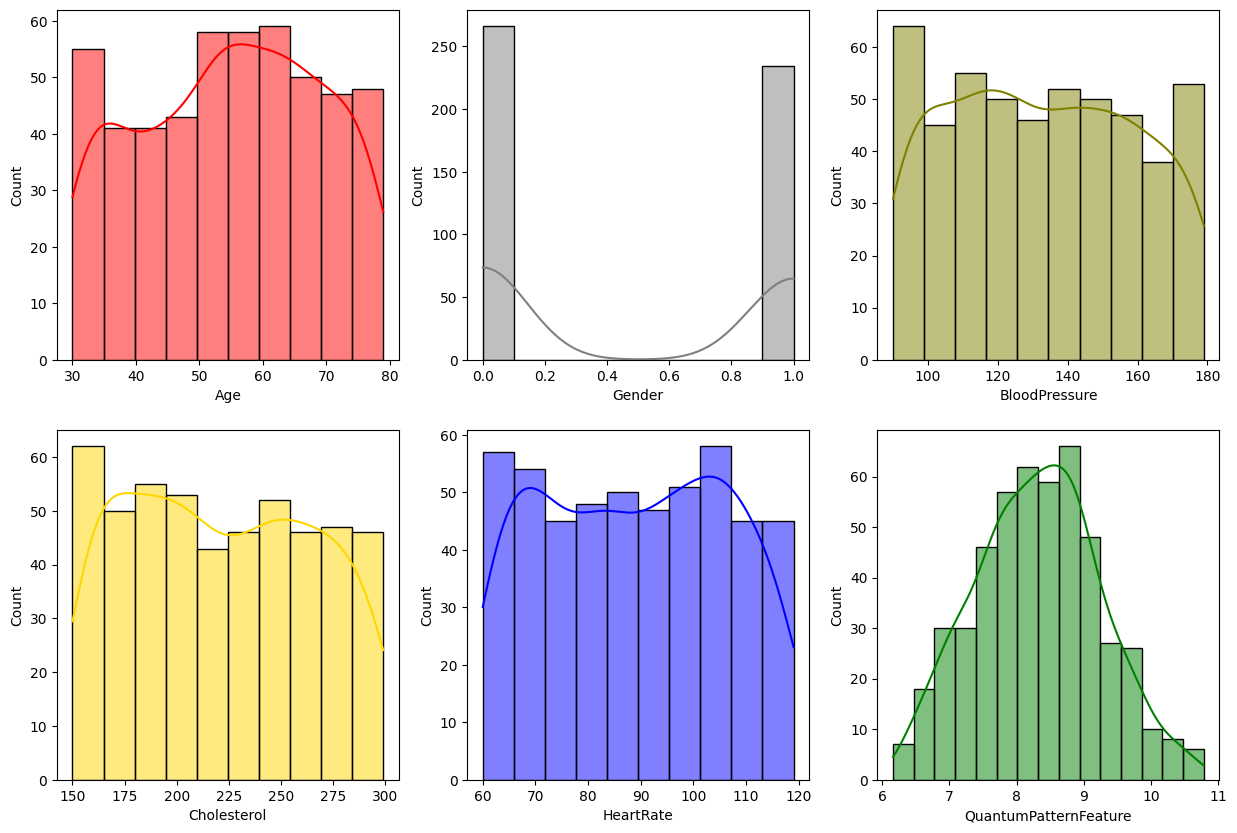

In [5]:
fig, axs = plt.subplots(2,3, figsize=(15, 10))
      
sns.histplot(data=data, x="Age", kde=True, color="red", ax=axs[0,0])
sns.histplot(data=data, x="Gender", kde=True, color="grey", ax=axs[0,1])
sns.histplot(data=data, x="BloodPressure", kde=True, color="olive", ax=axs[0,2])
sns.histplot(data=data, x="Cholesterol", kde=True, color="gold", ax=axs[1,0])
sns.histplot(data=data, x="HeartRate", kde=True, color="blue", ax=axs[1,1])
sns.histplot(data=data, x="QuantumPatternFeature", kde=True, color="green", ax=axs[1,2])

plt.show()

In [6]:
# subset_features = ['Age','Gender','BloodPressure','Cholesterol','HeartRate','QuantumPatternFeature']
# sns.pairplot(data[subset_features], hue='HeartDisease', palette='Set1', diag_kind='kde')
# plt.suptitle("Pair Plot of the Heart Prediction Features", y=1.02)  # Add title
# plt.show()

C:\Users\Samar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\seaborn\axisgrid.py:1615: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
C:\Users\Samar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\seaborn\axisgrid.py:1615: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
C:\Users\Samar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\seaborn\axisgrid.py:1615: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
C:\Users\Samar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sea

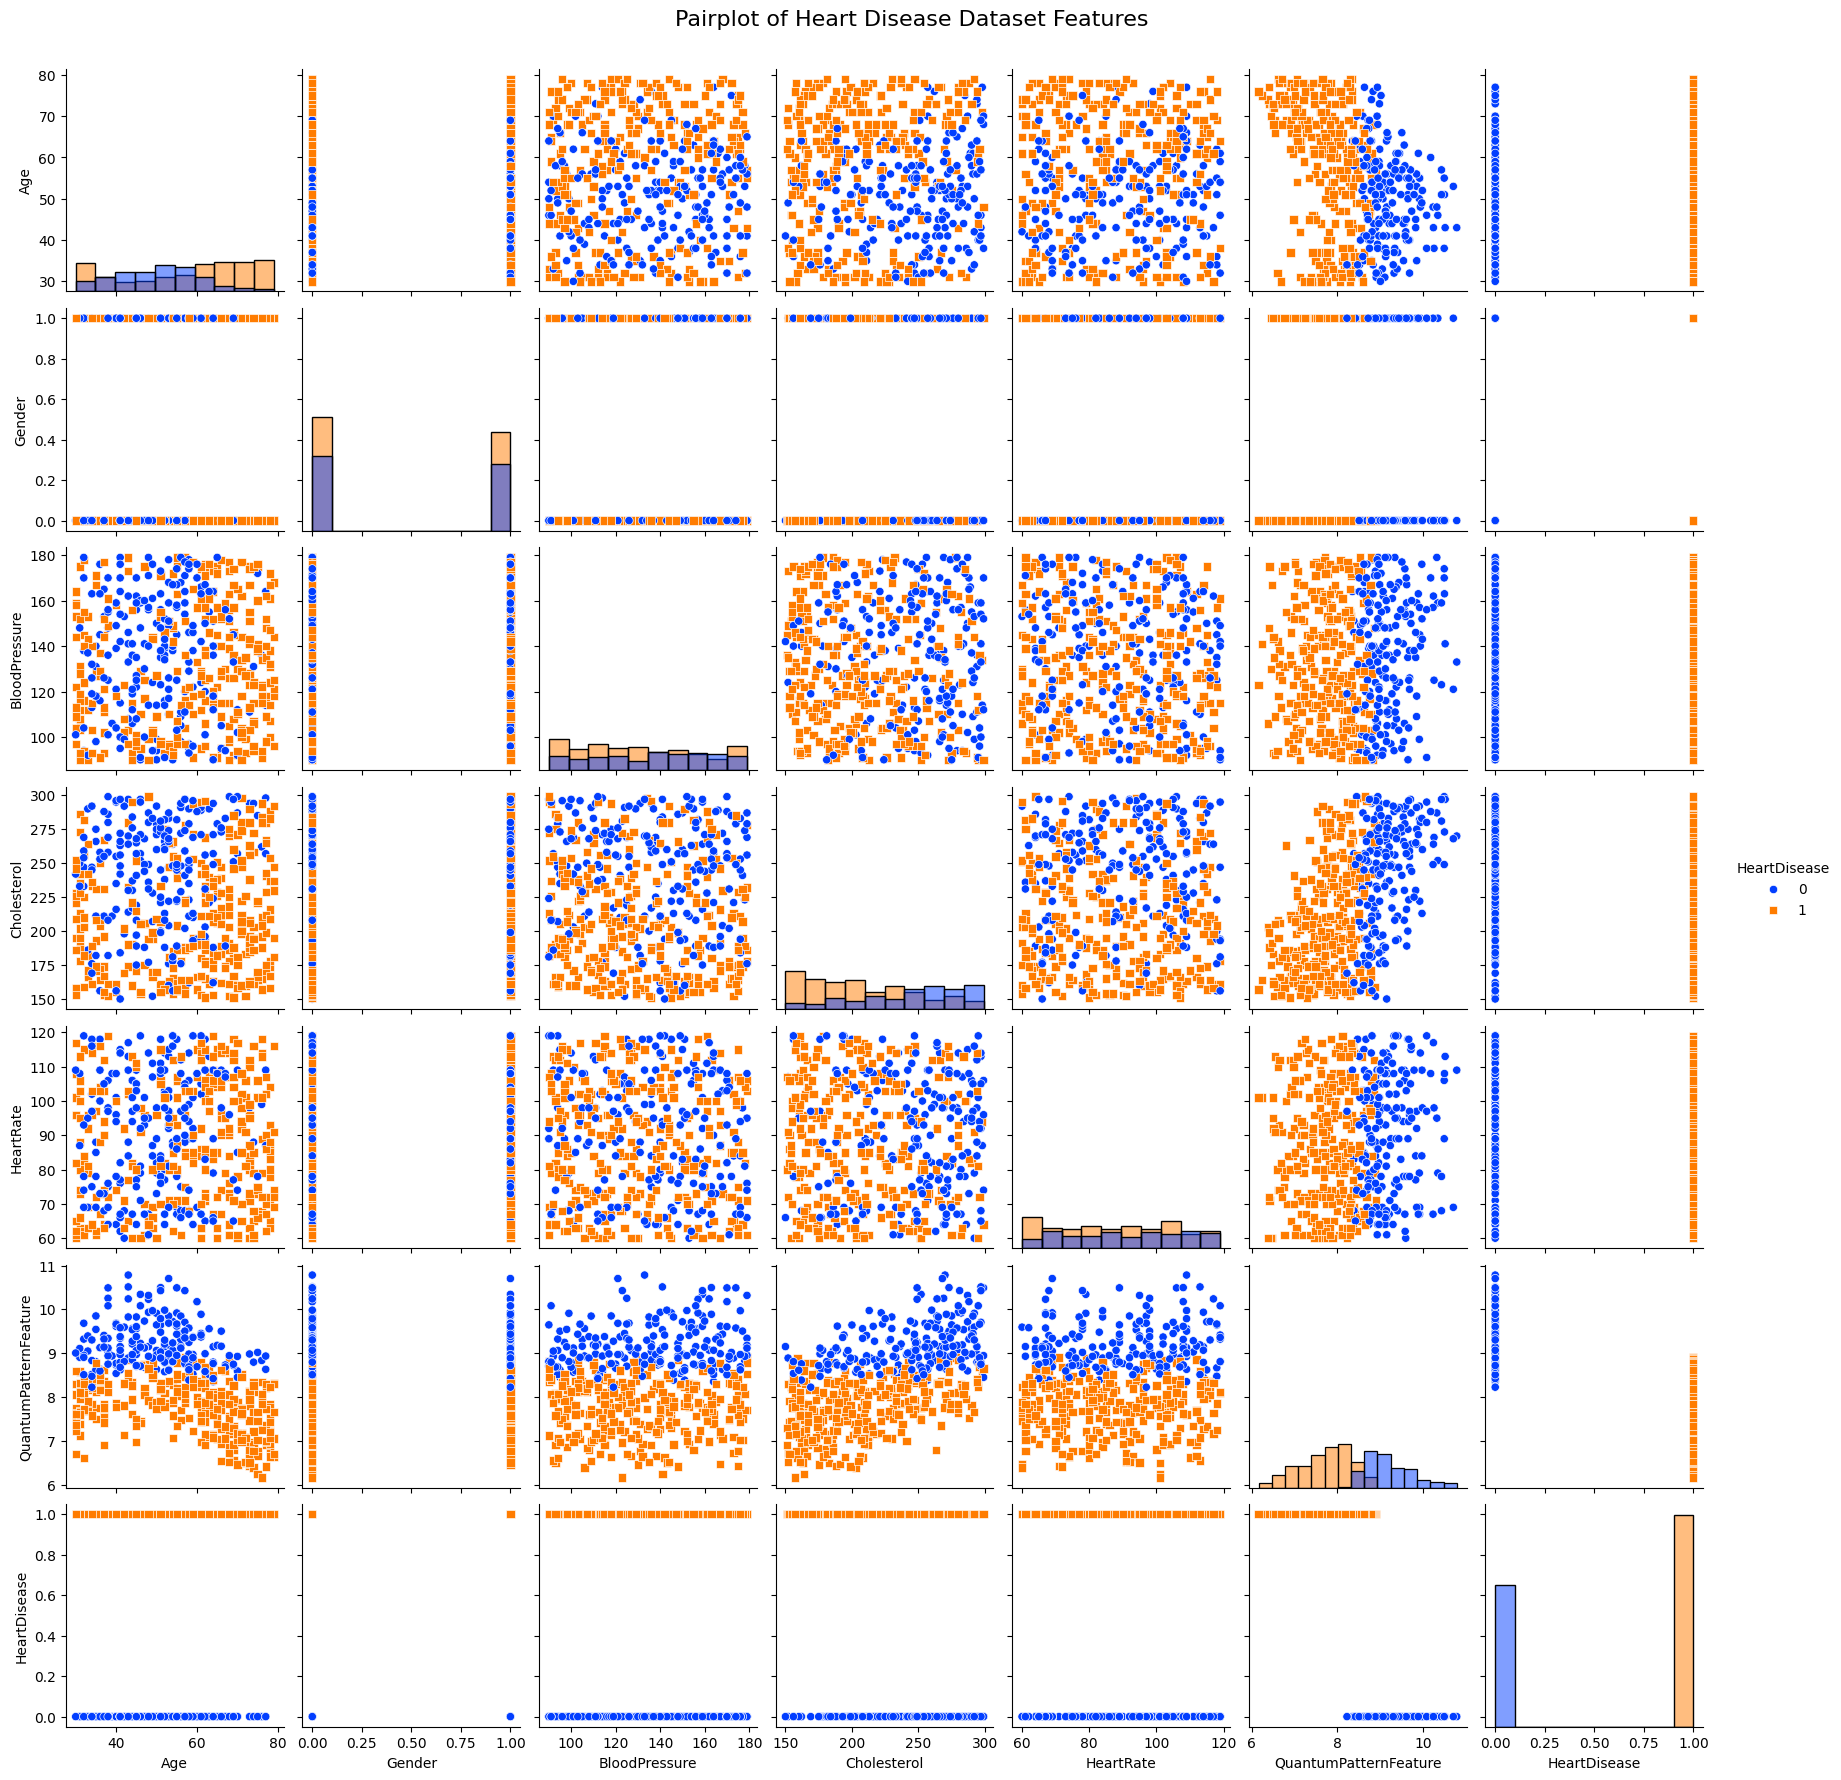

In [7]:
sns.pairplot(data, vars=data.columns, hue='HeartDisease', diag_kind='hist', palette='bright', markers=['o', 's', 'D'], height=2.5)
plt.suptitle("Pairplot of Heart Disease Dataset Features", y=1.02, fontsize=16)
plt.show()

In [8]:
y = data['HeartDisease']
X = data.drop('HeartDisease', axis=1)

In [9]:
y

0      1
1      0
2      1
3      1
4      1
      ..
495    0
496    0
497    0
498    1
499    0
Name: HeartDisease, Length: 500, dtype: int64

In [10]:
X

,Age,Gender,BloodPressure,Cholesterol,HeartRate,QuantumPatternFeature
0,68,1,105,191,107,8.362241
1,58,0,97,249,89,9.249002
2,44,0,93,190,82,7.942542
3,72,1,93,183,101,6.495155
4,37,0,145,166,103,7.653900
...,...,...,...,...,...,...
495,34,0,126,292,116,9.303403
496,41,0,164,248,114,9.067889
497,45,1,159,175,75,8.718708
498,55,0,107,157,101,7.337650


In [11]:
# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [12]:
# Scale the features
scaler = StandardScaler()                      
X_train_sc = scaler.fit_transform(X_train)  
X_test_sc = scaler.transform(X_test) 

In [13]:
# Checking which parameters are ideal for this 
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001,  0.0001], 
              'kernel': ['linear','rbf',]}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train) 

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.863 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.912 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.875 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.938 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.912 total time=   0.0s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.600 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.600 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.600 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.600 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.600 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.863 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf']},
             verbose=3)

In [14]:
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'C': 1, 'gamma': 1, 'kernel': 'linear'}
SVC(C=1, gamma=1, kernel='linear')


In [20]:
grid_predictions = grid.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, grid_predictions)) 

              precision    recall  f1-score   support

           0       0.87      0.97      0.92        40
           1       0.98      0.90      0.94        60

    accuracy                           0.93       100
   macro avg       0.92      0.94      0.93       100
weighted avg       0.94      0.93      0.93       100



In [21]:
# # Create and train the SVM classifier
# svm = SVC(kernel='rbf', random_state=42)
# svm.fit(X_train, y_train)



In [22]:
# Evaluate the model
accuracy = accuracy_score(y_test, grid_predictions)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.93


In [24]:
precision = precision_score(y_test, grid_predictions)
print(f"Precision: {precision:.2f}")

Precision: 0.98


In [26]:
precision, recall, thresholds = precision_recall_curve(y_test, grid_predictions)

In [ ]:
#Compute average precision score (for reference)
avg_precision = average_precision_score(y_test, grid_predictions)
print(f"Average Precision Score: {avg_precision:.4f}")

Average Precision Score: 0.9436


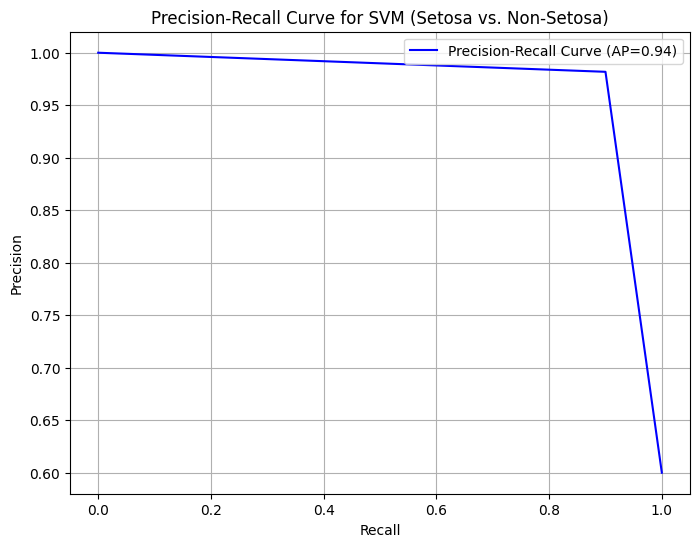

In [ ]:
#Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AP={avg_precision:.2f})', color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for SVM')
plt.grid(True)
plt.legend()
plt.show()